## Import all the necessary libraries at once, for the visualization.

In [1]:
# First, ensure you have the necessary libraries installed.
# You can install them using pip:
# !pip install pandas matplotlib seaborn panel hvplot

# Import required libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating static plots
import seaborn as sns  # For advanced statistical visualizations

import panel as pn  # For creating interactive dashboards and applications
import hvplot.pandas  # For interactive plotting with pandas DataFrames

## We illustrate here the multiple features from the hydrogel tests credited to Verheyen et al., *Integrated data-driven modeling and experimental optimization of granular hydrogel matrices*, Matter, 2023. (https://doi.org/10.1016/j.matt.2023.01.011).

## The dataset is loaded from the  folder '~/dataset/'

In [2]:
# Load the dataset, saved in the folder ~/dataset/
file_path = '../../dataset/Dataset_PhaseSepVolumeFractionEstimation.csv'    # Relative path to the dataset file, change to
                                                                            #'./dataset/Dataset_PhaseSepVolumeFractionEstimation.csv' when start from the root directory in terminal
dataset = pd.read_csv(file_path)  # Read the CSV file into a pandas DataFrame

## First, we know hydrogel is a complex materials system. From raw experiment, it shows *multi-dimensional features*, e.g., solvent concentration, fluid loss over time, gelation time, etc. Therefore, it turns out to be helpful if we can use a *heatmap below to show the correlations* between hydrogel's different features. The map shows the relevance of these features straightforward. The *colorbar* is plotted such that deeper color suggests higher relevance.

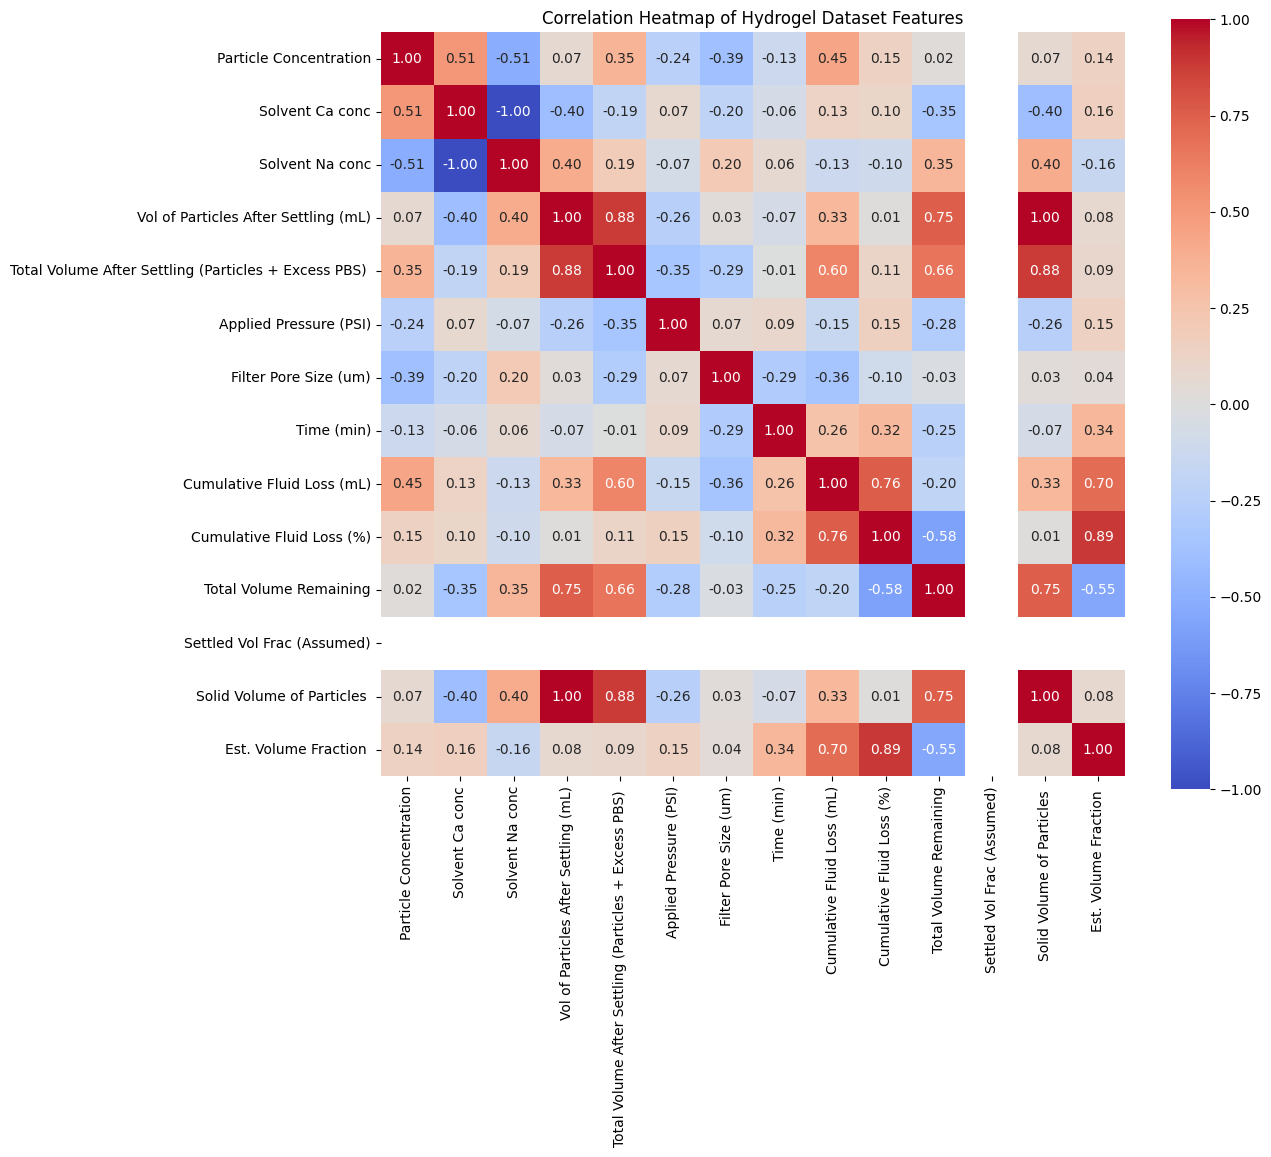

In [3]:
# ------------------------------------------------------------------------------------
# Heatmap for Correlation Matrix
# ------------------------------------------------------------------------------------

# Calculate the correlation matrix for numeric columns in the dataset
correlation_matrix = dataset.select_dtypes(include=['float64', 'int64']).corr()

# Set up the figure size for the heatmap
plt.figure(figsize=(12, 10))

# Plot the heatmap using seaborn
sns.heatmap(
    correlation_matrix,  # The correlation matrix to visualize
    annot=True,          # Annotate each cell with its correlation coefficient
    fmt=".2f",           # Format the annotations to two decimal places
    cmap="coolwarm",     # Color map ranging from cool to warm colors
    cbar=True,           # Include a color bar to indicate the correlation values
    square=True          # Make each cell square-shaped for a cleaner look
)

# Add a title to the heatmap
plt.title("Correlation Heatmap of Hydrogel Dataset Features")

# Display the heatmap
plt.show()

## To understand the statistical pattern of the dataset, we visualized here a *violin* plot to show the distribution of volume fractions classified by the mechanical stiffness.

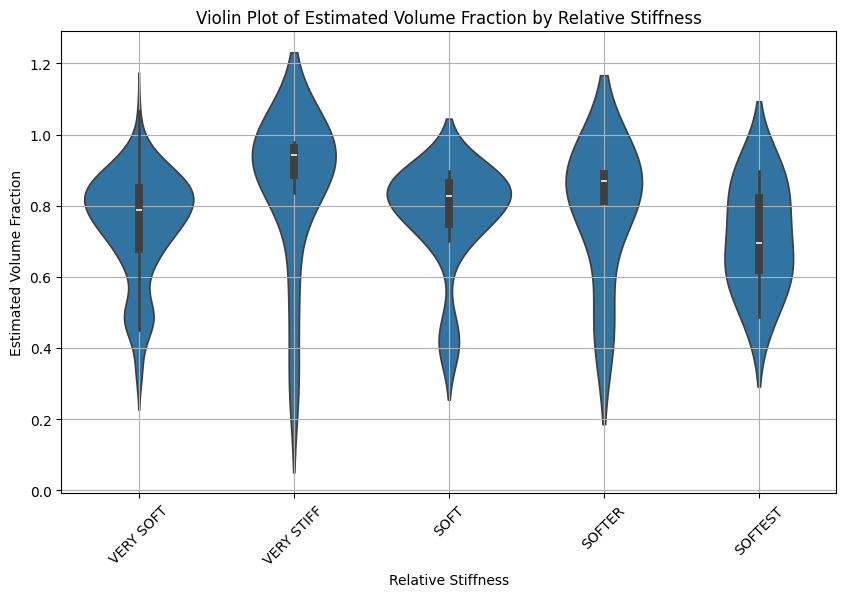

In [4]:
# ------------------------------------------------------------------------------------
# Violin Plot of Estimated Volume Fraction by Relative Stiffness
# ------------------------------------------------------------------------------------

# Set up the figure size for the violin plot
plt.figure(figsize=(10, 6))

# Create a violin plot using seaborn
sns.violinplot(
    x='Relative Stiffness',        # Categorical variable on the x-axis
    y='Est. Volume Fraction ',     # Numeric variable on the y-axis
    data=dataset                   # Data source
)

# Set the x and y axis labels
plt.xlabel('Relative Stiffness')
plt.ylabel('Estimated Volume Fraction')

# Add a title to the plot
plt.title('Violin Plot of Estimated Volume Fraction by Relative Stiffness')

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Add grid lines to the plot for easier interpretation
plt.grid(True)

# Display the violin plot
plt.show()

## The interactive panel is design such that the user can see the histogram of the mechanical stiffness of gels by sliding a bar to filter based on the Volume of particles after settling

/var/folders/9t/bj4j28gn3f54ncfh2yr9d8240000gn/T/ipykernel_38815/943562495.py:6: UserWarning: Using Panel interactively in VSCode notebooks requires the jupyter_bokeh package to be installed. You can install it with:

   pip install jupyter_bokeh

or:
    conda install jupyter_bokeh

and try again.
  pn.extension()


Launching server at http://localhost:59112


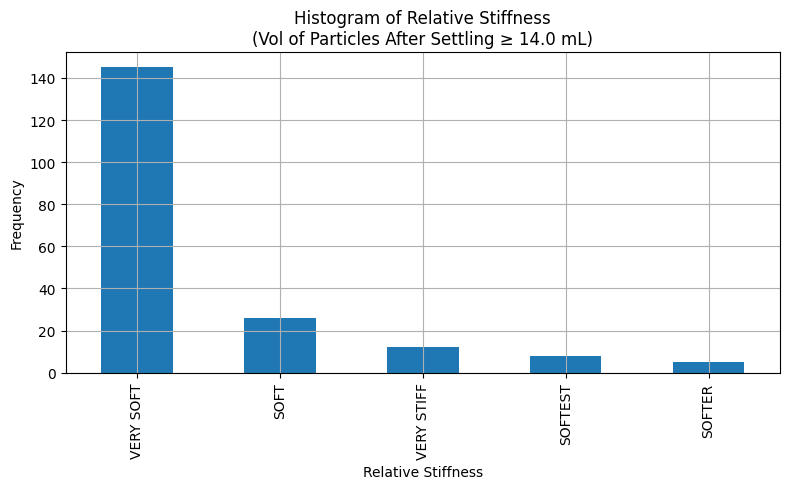

In [5]:
# ------------------------------------------------------------------------------------
# Interactive Panel
# ------------------------------------------------------------------------------------

# Enable the Panel extension to activate widgets and interactive features
pn.extension()

# Create a FloatSlider widget for "Vol of Particles After Settling (mL)"
volume_slider = pn.widgets.FloatSlider(
    name='Vol of Particles After Settling (mL)',  # Label displayed above the slider
    start=dataset['Vol of Particles After Settling (mL)'].min(),  # Minimum slider value from data
    end=dataset['Vol of Particles After Settling (mL)'].max(),    # Maximum slider value from data
    step=0.5,  # Increment step for the slider
    value=dataset['Vol of Particles After Settling (mL)'].min()   # Initial value of the slider
)

# Define the plotting function that updates when the slider value changes
@pn.depends(volume=volume_slider.param.value)  # The function depends on the 'value' of the slider
def histogram_plot(volume):
    # Filter the dataset based on the current slider value
    filtered_data = dataset[dataset['Vol of Particles After Settling (mL)'] >= volume]
    
    # Check if the filtered dataset is empty
    if filtered_data.empty:
        # Return a message if no data matches the filter criteria
        return "No data available for the selected volume."

    # Create a new figure for the histogram
    plt.figure(figsize=(8, 5))
    
    # Generate a bar plot of the counts of "Relative Stiffness" in the filtered data
    filtered_data['Relative Stiffness'].value_counts().plot(kind='bar')
    
    # Add a title to the histogram, including the current slider value
    plt.title(f'Histogram of Relative Stiffness\n(Vol of Particles After Settling ≥ {volume} mL)')
    
    # Set the x and y axis labels
    plt.xlabel('Relative Stiffness')
    plt.ylabel('Frequency')
    
    # Add grid lines to the plot for better readability
    plt.grid(True)
    
    # Adjust the layout to prevent overlapping elements
    plt.tight_layout()
    
    # Return the current figure object to be displayed in the Panel
    return plt.gcf()

# Create the interactive layout using Panel
interactive_panel = pn.Column(
    "### Interactive Histogram of Relative Stiffness",  # Title of the interactive panel
    "Adjust the slider to filter data based on 'Vol of Particles After Settling (mL)':",  # Instructions
    volume_slider,  # The slider widget for user input
    histogram_plot  # The reactive plotting function that updates with the slider
)

# To display the interactive panel in a Jupyter notebook, use:
interactive_panel.show()

# For standalone use in a browser, save this code to a file (e.g., 'app.py') and run:
# panel serve app.py